<a href="https://colab.research.google.com/github/asy047/TensorFlowDeepLearning/blob/master/0726_Day02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손실 곡선

***이 녀석이 과연 학습을 제대로 하고 있나 .. ?***

1. 확인하기 위해 손실과 epochs를 시각화하는 방법.
2. train_test_split -> (x_val, y_val) <= 만들어 놓고 써먹지 않았었는데, 이 검증용 데이터를 활용하는 방법에 대해 설명할 예정.
3. 제프리 힌턴 교수님이 딥러닝의 성공을 위해 세가지 업적, 그 중의 하나가 드롭아웃 기법. (딥러닝 모델이 잘 학습할 수 있도록 만듦)

  => 과대적합 문제 해결
4. 모델을 저장하고 복원하는 방법 (배포)



In [ ]:
# fit 객체는 History 객체를 반환함 사실.
# 이를 여러가지로 활용할 수 있음.

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 정규화
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# 모델 만드는 함수
def model_make(a_layer=None):  # 또 층을 추가하고 싶으면 이 model_make를 호출해서 생성할 수 있음
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))   # 2D -> 1D
  model.add(keras.layers.Dense(100, activation='relu'))

  if a_layer:  # model_make 함수에 입력값이 있다면 아래를 실행
    model.add(a_layer)

  model.add(keras.layers.Dense(10, activation='softmax')) # 출력층 생성, 패션 아이템은 10종류이기 때문에 10 입력
  return model

In [3]:
model = model_make()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.engine.training import optimizer

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
h = model.fit(x_train_scaled, y_train, epochs=5, verbose=2)  # 하나하나 학습되는걸 실시간 print하지만 이걸 조절하는 파라미터 verbose=[0/1/2]
# 0으로 하면 status가 안 뜸
# 1 기본값
# 2 Epoch 출력, Status Bar 출력 안 됨.

Epoch 1/5
1500/1500 - 4s - loss: 0.2416 - accuracy: 0.9088 - 4s/epoch - 3ms/step
Epoch 2/5
1500/1500 - 6s - loss: 0.2327 - accuracy: 0.9134 - 6s/epoch - 4ms/step
Epoch 3/5
1500/1500 - 4s - loss: 0.2272 - accuracy: 0.9148 - 4s/epoch - 3ms/step
Epoch 4/5
1500/1500 - 4s - loss: 0.2203 - accuracy: 0.9185 - 4s/epoch - 3ms/step
Epoch 5/5
1500/1500 - 8s - loss: 0.2148 - accuracy: 0.9189 - 8s/epoch - 5ms/step


In [14]:
print(type(h))
print(h)

print(h.history) # loss와 accuracy 값이 Dictionary 형태로 저장되어 있음.
print(h.history.keys())

<class 'keras.callbacks.History'>
{'loss': [0.24163584411144257, 0.23267702758312225, 0.22716334462165833, 0.2203206717967987, 0.21479792892932892], 'accuracy': [0.9087916612625122, 0.9134374856948853, 0.9147916436195374, 0.9185208082199097, 0.918874979019165]}
dict_keys(['loss', 'accuracy'])


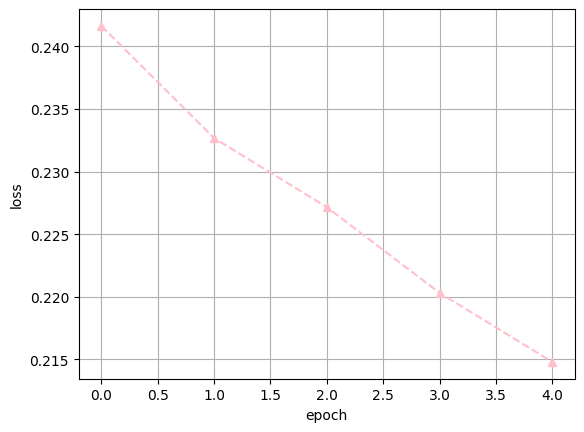

In [22]:
loss_history = h.history['loss']

import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_history, '--^', c='pink')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()
# loss 값 감소 확인

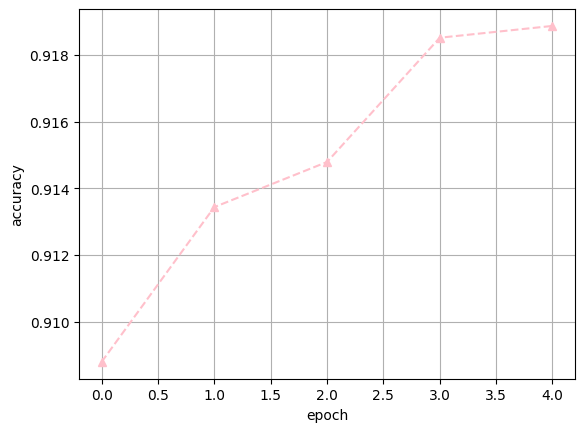

In [24]:
acc_history = h.history['accuracy']

import matplotlib.pyplot as plt

plt.figure()
plt.plot(acc_history, '--^', c='pink')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()
# accuracy 값 상승 확인

In [19]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3657 - accuracy: 0.8777


[0.36568114161491394, 0.8776999711990356]